In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
# 读取MongoDB数据
def read_data():
    import pymongo
    from pymongo import MongoClient
    client = MongoClient()
    db = client.JIANSHU
    collection = db.WEEKLY
    data = pd.DataFrame(list(collection.find()))
    return data

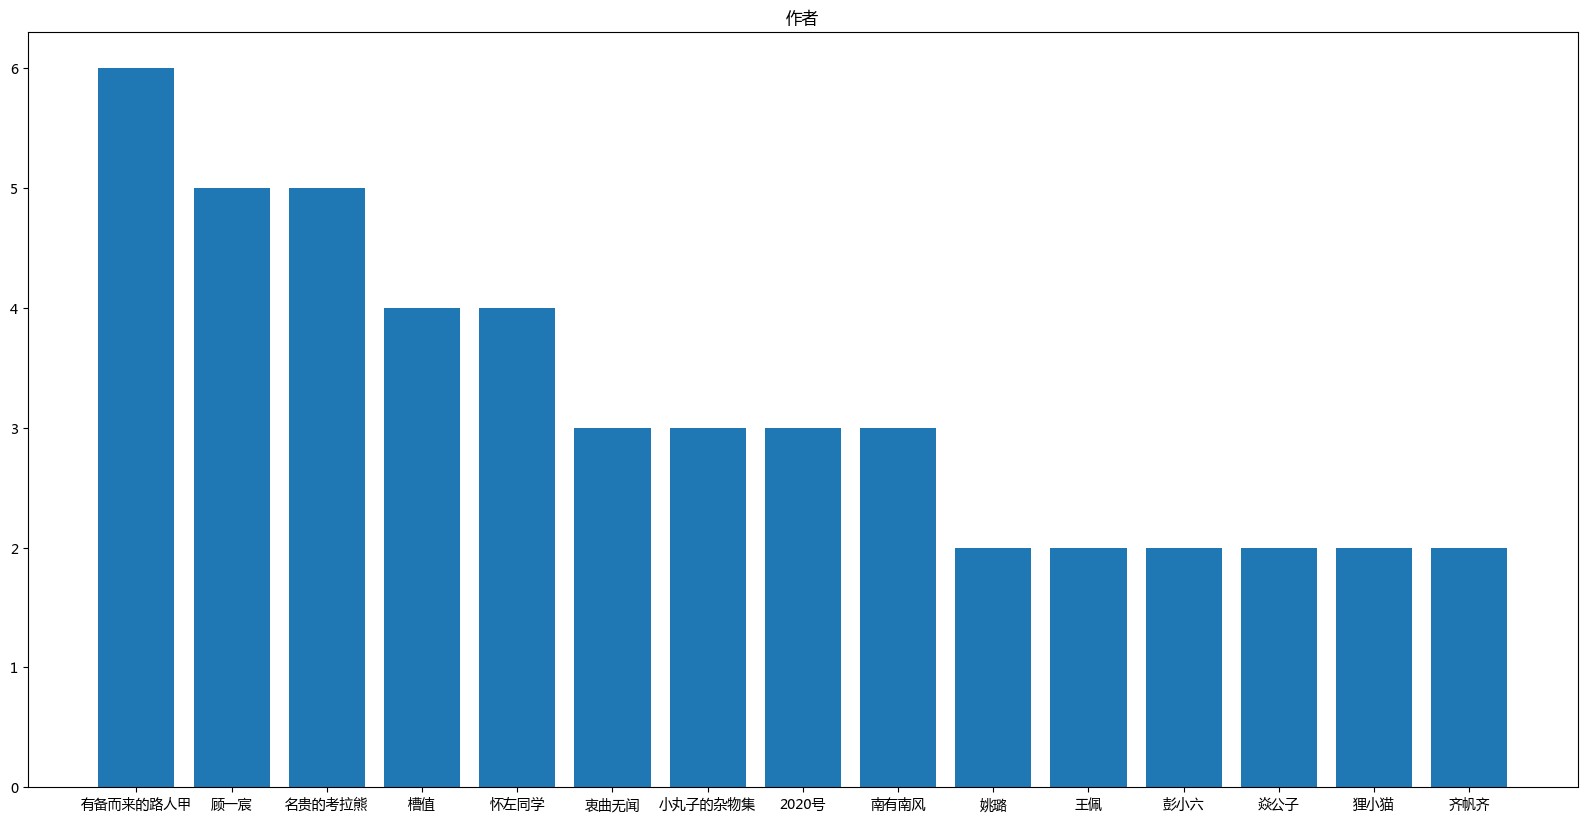

In [2]:
# 去重，文章链接一样的数据视为重复数据
data = read_data().drop_duplicates(['article_url'])
userClientCol = ['作者', '文章数']
# 构造DataFrame，注意：需数组转置
userClientDataFrame = pd.DataFrame(numpy.array([list(set(data.get('author'))), [list(data.get('author')).count(level) for level in list(set(data.get('author')))]]).T, columns=userClientCol)
# 根据作者文章数量进行排序，排序方式为降序
userClientDataFrame = userClientDataFrame.sort_values('文章数', ascending=False)
# 选取文章数量前20名的作者
userClientDataFrame = userClientDataFrame.head(15)
plt.figure(figsize=(20,10),dpi=100)
labels = list(userClientDataFrame['作者'])
plt.bar(range(len(labels)),userClientDataFrame['文章数'],tick_label=labels)
plt.title('作者')
plt.show()

> 说明：Mac默认的Python或Anaconda环境下，中文会出现乱码，解决方法如下
* 下载微软雅黑.ttf文件
* 重命名为DejaVuSans.ttf
* 替换掉/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf（Anaconda环境）

In [7]:
import pymongo
from pymongo import MongoClient
client = MongoClient()
db = client.JIANSHU
collection = db.WEEKLY
# 查询MongoDB数据库中某一字段的值，如果数量为0，写入数据库，如果大于0，跳过
collection.find({'author': '有备而来的路人甲'}).count()

6